# Training of Handwritten Digit Recongnization with Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Read Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Vizualize some images

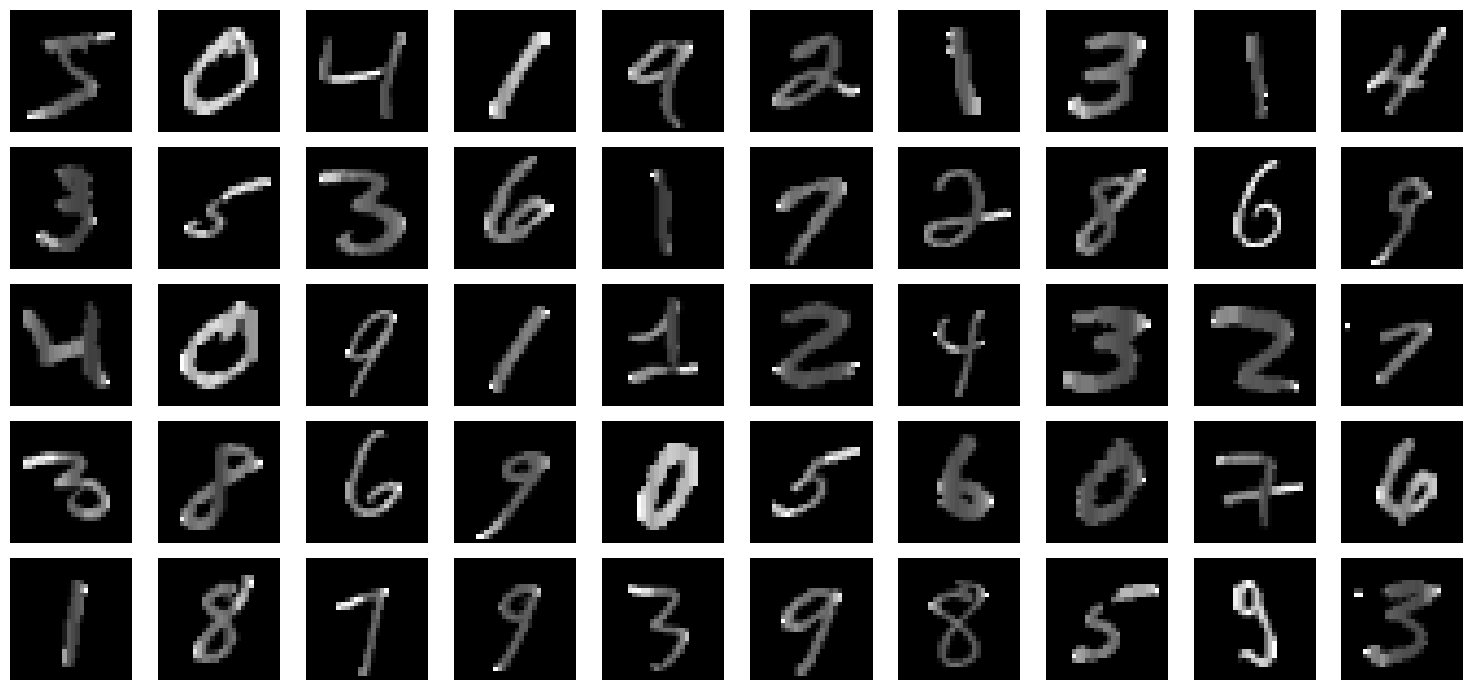

In [4]:
visualize_images = x_train
# Number images display
num_images = 50

# Grid dimension
rows = 5
cols = 10

# Prepare figure
plt.figure(figsize=(15, 7))

for i, img in enumerate(visualize_images[:num_images]):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Train and evaluate model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


/Users/axelturchinim23000/Documents/dev/projects/handwritten_digit_recognization/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8559 - loss: 0.5271
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9573 - loss: 0.1519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9710 - loss: 0.0968
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9785 - loss: 0.0710
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9830 - loss: 0.0562
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.9707 - loss: 0.0964


[0.0851377323269844, 0.9747999906539917]

## Save model

In [7]:
model.save('../model/handwritten-tf.model.keras')